# Introduction

In [ ]:
"""
What? Introduction to PCA

We explore what is perhaps one of the most broadly used of unsuper‐ vised algorithms, principal component 
analysis (PCA). PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a 
tool for visualization, for noise filtering, for feature extraction and engineering, and much more

VanderPlas, Jake. Python data science handbook: Essential tools for working with data. "O'Reilly Media, Inc.", 2016.
https://github.com/jakevdp/PythonDataScienceHandbook
"""

# Import modules

In [3]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA 

# Create dataset

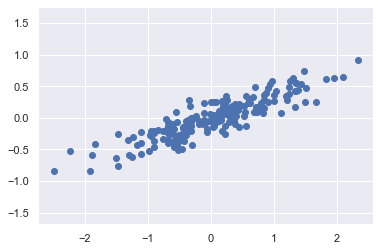

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

# PCA modelling

In [ ]:
"""
The problem setting here is slightly different than regression: rather than attempting to predict the y values from 
the x values, the PCA attempts to learn about the relationship between the x and y values by finding a list of the 
principal axes in the data, and using those axes to describe the dataset.
"""

In [12]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [13]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [14]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


# How to use compopnent and explained variance

In [ ]:
"""
To see what these numbers mean, let’s visualize them as vectors over the input data, using the “components” 
to define the direction of the vector, and the “explained var~iance” to define the squared-length of the vector.
"""

In [29]:
def draw_vector(v0, v1, ax=None): 
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0, color = "k")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

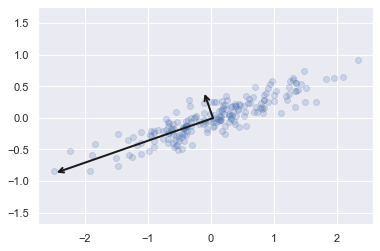

In [30]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [ ]:
"""
These vectors represent the principal axes of the data, and the length shown in Figure is an indication
of how “important” that axis is in describing the distribution of the data—more precisely, it is a measure 
of the variance of the data when pro‐ jected onto that axis.
"""

# PCA as dimensionality reduction

In [ ]:
"""
Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, 
resulting in a lower-dimensional projection of the data that preserves the maximal data variance.
"""

In [32]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X) 
print("original shape: ", X.shape) 
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


In [ ]:
"""
The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality 
reduction, we can perform the inverse transform of this reduced data and plot it along with the original data
"""

(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

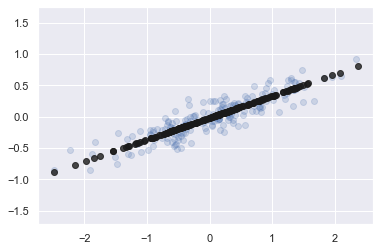

In [35]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, c="k")
plt.axis('equal')

In [ ]:
"""
The light points are the original data, while the dark points are the projected version. This makes clear what a 
PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, 
leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out 
(proportional to the spread of points) is roughly a meas‐ ure of how much “information” is discarded in this 
reduction of dimensionality.


This reduced-dimension dataset is in some senses “good enough” to encode the most important relationships between 
the points: despite reducing the dimension of the data by 50% (from 2 down to 1), the overall relationship between 
the data points is mostly preserved.
"""